# Library Declaration

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import math
from sklearn import metrics
#import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor

# Reading Dataset

In [8]:
fifa = pd.read_csv('CompleteDataset.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
fifa.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [0]:
#Removing unnecessary columns

In [0]:
fifa=fifa.drop(['Unnamed: 0','Flag','Photo','Club Logo'],axis=1)

In [0]:
#Checking null values

In [13]:
fifa.isna().sum()

Name                      0
Age                       0
Nationality               0
Overall                   0
Potential                 0
Club                    248
Value                     0
Wage                      0
Special                   0
Acceleration              0
Aggression                0
Agility                   0
Balance                   0
Ball control              0
Composure                 0
Crossing                  0
Curve                     0
Dribbling                 0
Finishing                 0
Free kick accuracy        0
GK diving                 0
GK handling               0
GK kicking                0
GK positioning            0
GK reflexes               0
Heading accuracy          0
Interceptions             0
Jumping                   0
Long passing              0
Long shots                0
                       ... 
Vision                    0
Volleys                   0
CAM                    2029
CB                     2029
CDM                 

In [0]:
#filling null values in club column by u and other null values by 0

In [0]:
fifa['Club'].fillna('U',inplace=True)

In [0]:
fifa.fillna('0',inplace=True)

In [17]:
fifa.isna().sum()#checking null values

Name                   0
Age                    0
Nationality            0
Overall                0
Potential              0
Club                   0
Value                  0
Wage                   0
Special                0
Acceleration           0
Aggression             0
Agility                0
Balance                0
Ball control           0
Composure              0
Crossing               0
Curve                  0
Dribbling              0
Finishing              0
Free kick accuracy     0
GK diving              0
GK handling            0
GK kicking             0
GK positioning         0
GK reflexes            0
Heading accuracy       0
Interceptions          0
Jumping                0
Long passing           0
Long shots             0
                      ..
Vision                 0
Volleys                0
CAM                    0
CB                     0
CDM                    0
CF                     0
CM                     0
ID                     0
LAM                    0


In [0]:
#Dropping Preferred positions for convienient removal of symbols inn dataset

In [0]:
f=fifa['Preferred Positions']

In [0]:
fifa=fifa.drop(['Preferred Positions'],axis=1)

In [0]:
#remove all symbols

In [0]:
def fix(x):
    x = str(x)
    if('+' in x):
        calc = x.split('+')
        return int(calc[0]) + int(calc[1])
    elif('-' in x):
        calc = x.split('-')
        return int(calc[0]) - int(calc[1])
    elif x.isdigit():
        return int(x)
    else:
         return float(x)
for column in fifa.iloc[:,9:72]:
    fifa[column] = fifa[column].apply(fix)


In [0]:
# removal of special symbols

In [0]:
fifa['Value'] = fifa['Value'].str.replace('€','')
fifa['Wage'] = fifa['Wage'].str.replace('€',' ')

In [0]:
#dropping string columns

In [0]:
fifa=fifa.drop(['Name','Nationality','Club','Value','Wage'],axis=1)

# Correlation

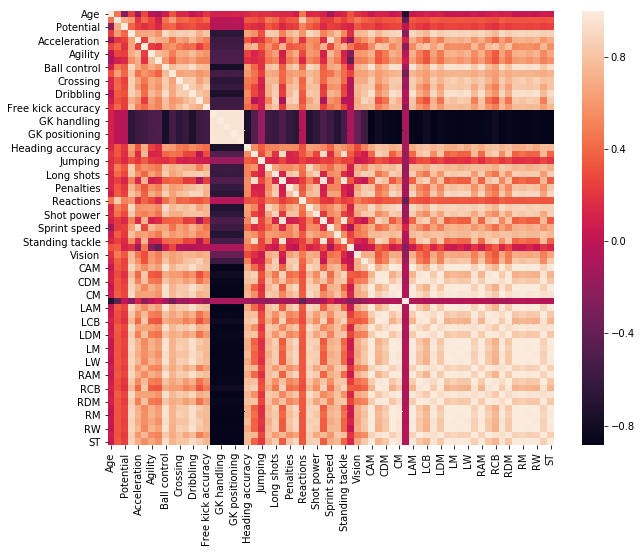

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(fifa.corr())

# Train_Test_Split

In [28]:
x=fifa.drop(['Overall'],axis=1)
y=fifa['Overall']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x.head()

,Age,Potential,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,32,94,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,30,93,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,25,94,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,30,92,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,31,92,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,0.0,0.0,0.0,0.0,0.0,167495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train.values,y_train.values)
print(lr.intercept_)
print(lr.coef_)

-21.512317095271115
[ 5.84440812e-01  5.60242041e-01  1.43228316e-02  3.94723031e-03
 -2.20208692e-02 -1.12564369e-02 -2.91873004e-02  4.26649210e-02
  4.16085126e-02 -1.14241419e-02 -1.11065428e-02 -2.53984706e-02
 -2.12530988e-02 -8.25645655e-03  4.33701956e-02  4.19067107e-02
  3.14150555e-02  2.86189919e-02  4.47284367e-02  2.57929904e-02
 -1.68461971e-02 -1.02711788e-02 -3.18484925e-02 -1.68638096e-02
 -1.26672909e-02 -2.45062728e-02 -5.05256363e-02  1.19340997e-01
  1.36820620e-02 -1.38272089e-02 -3.27374170e-02  8.62577706e-05
 -1.82927459e-03 -4.23606045e-03  2.98046738e-03 -2.44414238e-02
 -1.17523182e-02 -2.87608658e-02 -1.02960829e-02  5.60437316e-02
 -3.52981662e-02 -1.77470637e-02  1.29948600e-05 -2.87608658e-02
 -3.32012265e-02 -1.02960829e-02 -1.77470637e-02  5.60437316e-02
 -3.52981662e-02  4.72799219e-02  5.00624951e-02  4.77561878e-02
  1.18096291e-02 -2.87608658e-02 -3.32012265e-02 -1.02960829e-02
 -1.77470637e-02  5.60437316e-02 -3.52981662e-02  4.72799219e-02
  5.0

# RMSE Evaluation

In [30]:
from sklearn.metrics import mean_squared_error,r2_score
import math

train_pred_y=lr.predict(x_train)
test_pred_y=lr.predict(x_test)
print("Rmse train:",math.sqrt(mean_squared_error(y_train,train_pred_y)))
print("Rmse test:",math.sqrt(mean_squared_error(y_test,test_pred_y)))

Rmse train: 1.8802039794249423
Rmse test: 1.909527041067503


# Error Histogram

(array([1.000e+00, 1.000e+00, 1.000e+00, 1.200e+01, 2.300e+01, 2.700e+01,
        7.800e+01, 1.520e+02, 2.350e+02, 4.260e+02, 6.230e+02, 9.040e+02,
        1.024e+03, 7.900e+02, 5.600e+02, 3.280e+02, 1.450e+02, 4.800e+01,
        1.400e+01, 3.000e+00]),
 array([-9.6815076 , -8.87748922, -8.07347084, -7.26945246, -6.46543409,
        -5.66141571, -4.85739733, -4.05337895, -3.24936057, -2.4453422 ,
        -1.64132382, -0.83730544, -0.03328706,  0.77073132,  1.57474969,
         2.37876807,  3.18278645,  3.98680483,  4.79082321,  5.59484158,
         6.39885996]),
 <a list of 20 Patch objects>)

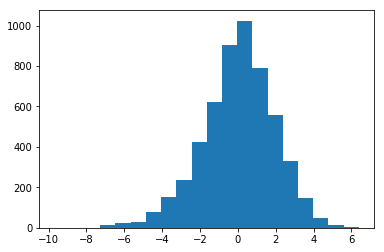

In [31]:
plt.hist(y_test-test_pred_y,bins=20)

# Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
n_estimators=30
# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [33]:

train_pred_y = model.predict(x_train)
test_pred_y = model.predict(x_test)
print("Rmse train:",math.sqrt(mean_squared_error(y_train,train_pred_y)))
print("Rmse test:",math.sqrt(mean_squared_error(y_test, test_pred_y)))

Rmse train: 0.3386182558815636
Rmse test: 0.8246115095576735


# Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [35]:
train_pred_y = regressor.predict(x_train)
test_pred_y = regressor.predict(x_test)
print("Rmse train:",math.sqrt(mean_squared_error(y_train,train_pred_y)))
print("Rmse test:",math.sqrt(mean_squared_error(y_test, test_pred_y)))

Rmse train: 0.0
Rmse test: 0.0
